In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.neighbors import KNeighborsClassifier
import mglearn

from sklearn import neighbors
from matplotlib.colors import ListedColormap

from sklearn.svm import SVC

Create $n\times 2$-dimensional array $X$  by sampling from $2$-dimensional Gaussian distribution with zero mean and covariance matrix $\Sigma$: $N(0,\Sigma)$. 

Label the examples $X_i\in\mathbb R^2$ as follows: if $\|X_i\|_2>1$, then $y_i=1$ with probability $q$ and $y_i=0$ with probabilty $1-q$. Otherwise, $y_i=0$ with probability $q$ and $y_i=1$ with probabilty $1-q$.

(Take, e.g., $n=1000$, $q=0.9$)

Hint: use `np.random.multivariate_normal`, `np.random.choice`, `np.linalg.norm`.

In [4]:
# CODE HERE
mean=[0,0]
cov=[[1,0],[0,1]]
N=1000
q=0.9
X = np.random.multivariate_normal(mean, cov, N)
norms = np.linalg.norm(X,axis=1)
y = np.zeros(N)
for i in range(N):
    if norms[i] > 1:
        y[i] = np.random.choice([1, 0],size = 1, p = [0.9, 0.1])
    else:
        y[i] = np.random.choice([1, 0],size = 1, p = [0.1, 0.9])
X
#y

array([[-0.98981812, -0.11832644],
       [-0.9267729 , -0.69594494],
       [-0.04512989,  0.01192683],
       ...,
       [ 1.10406253,  0.12100271],
       [ 0.28805439,  0.47896818],
       [-0.64320643, -0.81975818]])

array([[-0.41675785, -0.05626683],
       [-2.1361961 ,  1.64027081],
       [-1.79343559, -0.84174737],
       ...,
       [ 0.86196115,  0.22402915],
       [ 0.0106053 ,  0.86851322],
       [-0.12185276,  0.75622156]])

Make the scatter plot for the components of $X$. Select different markers for the labels $0$ and $1$.

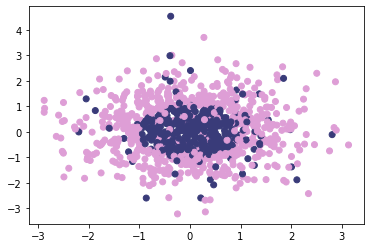

In [5]:
# CODE HERE
fig, ax = plt.subplots()
ax.scatter(X[:,0],X[:,1], c = y, cmap='tab20b') #cmap - color cmap='autumn' cmap='PiYG'

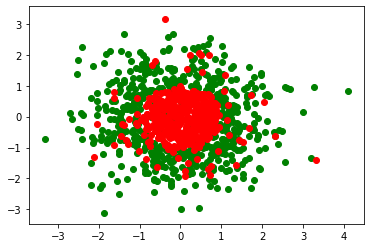

What is the proportion of examples, belonging to the positive class?

In [6]:
# CODE HERE
sum = 0
for el in y:
    if el == 1:
        sum += 1
print(sum/N)


0.593


0.559

Make a train-test split, using `train_test_split` with `random_state=1`. 

In [7]:
# CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #разделяем данные 30% на тестирование,  70% - обучение

Define the lists `training_accuracy`, `test_accuracy` (you can use arrays instead).

For the number of neighbors in $\{1,\dots,\max_n\}$ (e.g., $\max_n=200$)

1. Train the KNeighborsClassifier on the training set by using the `fit` method.
2. Make prediction for the training and validation sets and append the scores (accuracies) to the lists `training_accuracy`, `test_accuracy`.
3. Print the first 10 entries of these lists.

In [8]:
# CODE HERE
count_neibors = range(1, 200)
training_accuracy = []
test_accuracy = []
for i in count_neibors:
    clf = KNeighborsClassifier(n_neighbors = i)
    model = clf.fit(X_train, y_train)
    training_accuracy.append(model.score(X_train, y_train)) #точность обучения
    test_accuracy.append(model.score(X_test, y_test)) #точность тестирования
print("training_accuracy:")
print(training_accuracy[:10])
print("test_accuracy:")
print(test_accuracy[:10])

training_accuracy:
[1.0, 0.8757142857142857, 0.8857142857142857, 0.8757142857142857, 0.8742857142857143, 0.8714285714285714, 0.8642857142857143, 0.8657142857142858, 0.8714285714285714, 0.8657142857142858]
test_accuracy:
[0.79, 0.81, 0.8433333333333334, 0.8333333333333334, 0.8533333333333334, 0.87, 0.8733333333333333, 0.8666666666666667, 0.8566666666666667, 0.8633333333333333]


training_accuracy:
 [1.0, 0.896, 0.9026666666666666, 0.888, 0.8853333333333333, 0.884, 0.8893333333333333, 0.88, 0.88, 0.876]
test_accuracy:
 [0.84, 0.836, 0.868, 0.852, 0.88, 0.88, 0.888, 0.896, 0.9, 0.888]


Plot the graphs of the training and test accuracies against the number of neighbors (use `.xlabel`, `.ylabel`, `legend`). Do you see underfitting and overfitting?

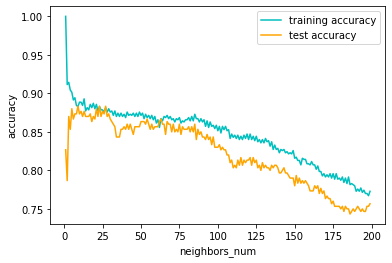

In [7]:
# CODE HERE
fig, ax = plt.subplots()
ax.set_xlabel('neighbors_num')
ax.set_ylabel('accuracy')
ax.plot(count_neibors,training_accuracy, 'c')
ax.plot(count_neibors,test_accuracy, 'orange')
ax.legend(['training accuracy','test accuracy'])


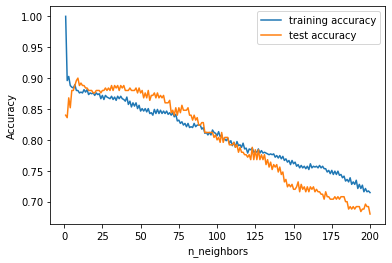

Print the maximal training and test accuracies.

In [8]:
# CODE HERE
print("maximal training accuracy ", np.max(training_accuracy))
print("maximal test accuracyy ", np.max(test_accuracy))

maximal training accuracy  1.0
maximal test accuracyy  0.8833333333333333


maximal training accuracy 1.0 
maximal test accuracy 0.9


Find the best predictor and print its training and test scores (use `np.asarray(test_accuracy)` to convert list to array if needed). 

In [9]:
# CODE HERE
print("best number of neighbors ", count_neibors[np.argmax(test_accuracy)]) #пик на графике
print("training accuracy ", training_accuracy[np.argmax(test_accuracy)])
print("test accuracy ", test_accuracy[np.argmax(test_accuracy)])

best number of neighbors  9
training accuracy  0.8828571428571429
test accuracy  0.8833333333333333


best number of neighbors 8 
training accuracy 0.88 
test accuracy 0.9


Plot the decision boundaries for the number of neighbors = 1, 3, 8, 200. The following code is due to Muller & Guido. However, you should import the module plots.plot_2d_separator from the module mglearn, created by Muller & Guido.

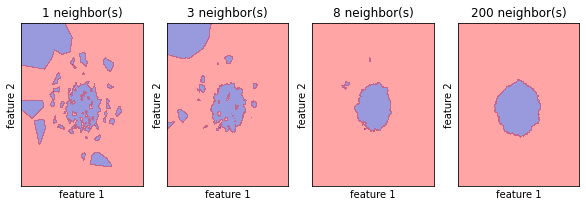

In [11]:
# sys.path.append('C:\\Users\\rokhl\\ML_2020\\mglearn')

fig, axes = plt.subplots(1, 4, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 8, 200], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(clf, X_train, fill=True, ax=ax, alpha=.4)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')

In [11]:
# Recall, how the meshgrid works
a=np.array([0,1,2])
b=np.array([0,2,4,6])
za,zb=np.meshgrid(a,b)
print('array of the first coordinates of all points of the grid:\n',za)
print('array of the second coordinates o all points of the grid:\n',zb)
# some function
def f(x,y):
    return x+y
# computing the function on the grid
f(za,zb)

array of the first coordinates of all points of the grid:
 [[0 1 2]
 [0 1 2]
 [0 1 2]
 [0 1 2]]
array of the second coordinates o all points of the grid:
 [[0 0 0]
 [2 2 2]
 [4 4 4]
 [6 6 6]]


array([[0, 1, 2],
       [2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

Using meshgrid and pcolormesh make plot the decision boundaries by yourself. Similar examples can be found in the `scikit-learn` documentation.

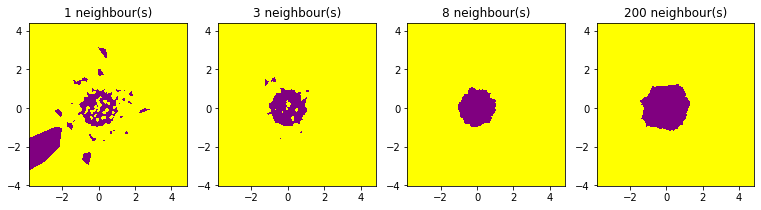

In [34]:
# CODE HERE
h = 0.01  # step size in the mesh

cmap_light = ListedColormap(["purple", "yellow"]) # Create color maps

fig = plt.figure(figsize =(13, 3))

ax_1 = fig.add_subplot(1, 4, 1)
ax_2 = fig.add_subplot(1, 4, 2)
ax_3 = fig.add_subplot(1, 4, 3)
ax_4 = fig.add_subplot(1, 4, 4)

ax = [ax_1,ax_2, ax_3, ax_4]
i = 0
for n_neighbors in [1, 3, 8, 200]:
# we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax[i].contourf(xx, yy, Z, cmap=cmap_light)
    ax[i].set(title = "%i neighbour(s)" % (n_neighbors))
    i = i + 1
plt.show()

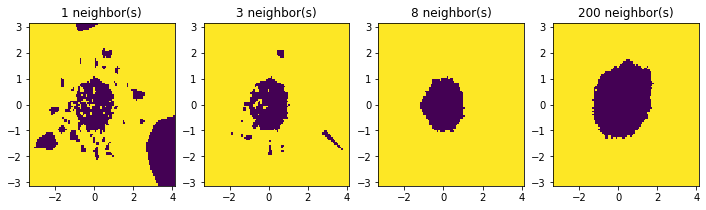

## Part 2.

Select the best number of neighbors by cross validation.

1. Import `GrigSearch` from `sklearn.model_selection`
2. Print possible hyperparameters for `KNeighborsClassifier()` by the method `.get_params().keys())`
3. Perform `GridSearchCV` with `cv=10` folds for the number of neighbors in $\{1,\dots,50\}$.
4. Print the best number of neighbors, and the scores of the respected KNN classifier.

In [9]:
clf = KNeighborsClassifier()
clf.get_params().keys()
parameters = {
    'n_neighbors': [i for i in range(1,51)],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
gs = GridSearchCV(clf, parameters, cv = 10)
gs.fit(X_train, y_train)
gs.best_score_


0.8585714285714285

In [10]:
print(gs.best_estimator_)
print("train score: ",gs.score(X_train,y_train))
print("test score: ",gs.score(X_test,y_test))

KNeighborsClassifier(metric='manhattan', n_neighbors=36, weights='distance')
train score:  1.0
test score:  0.8766666666666667


dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
{'n_neighbors': 13}
train score: 0.8813333333333333
test score: 0.888


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


For more information on the next exersize see *Albon 11.11*. 

Evaluate the effect of the number of observations in the training set on the learning process, using `learning_curve` from the module `sklearn.model_selection`. For 20 neighbors call it with `train_sizes=np.linspace(0.1, 1.0, 100)`
and fill the arrays `train_sizes`, `train_scores`, `validation_scores`.

In [12]:
train_sizes, train_scores, validation_scores = learning_curve(  estimator = KNeighborsClassifier(n_neighbors = 20),
                                                                X = X_train,
                                                                y = y_train, 
                                                                train_sizes = np.linspace(0.1, 1.0, 100), 
                                                                cv = 10,
                                                                scoring = 'neg_mean_squared_error')
print(train_sizes)
print(train_scores)
print(validation_scores)

[ 63  68  74  80  85  91  97 103 108 114 120 126 131 137 143 148 154 160
 166 171 177 183 189 194 200 206 211 217 223 229 234 240 246 252 257 263
 269 274 280 286 292 297 303 309 315 320 326 332 337 343 349 355 360 366
 372 378 383 389 395 400 406 412 418 423 429 435 441 446 452 458 463 469
 475 481 486 492 498 503 509 515 521 526 532 538 544 549 555 561 567 572
 578 584 589 595 601 607 612 618 624 630]
[[-0.26984127 -0.3015873  -0.3015873  -0.3015873  -0.3015873  -0.3015873
  -0.3015873  -0.3015873  -0.3015873  -0.3015873 ]
 [-0.27941176 -0.26470588 -0.26470588 -0.26470588 -0.26470588 -0.26470588
  -0.26470588 -0.26470588 -0.26470588 -0.26470588]
 [-0.2972973  -0.18918919 -0.25675676 -0.25675676 -0.25675676 -0.25675676
  -0.25675676 -0.25675676 -0.25675676 -0.25675676]
 [-0.3        -0.1875     -0.2375     -0.2375     -0.2375     -0.2375
  -0.2375     -0.2375     -0.2375     -0.2375    ]
 [-0.21176471 -0.22352941 -0.21176471 -0.21176471 -0.21176471 -0.21176471
  -0.21176471 -0.2117647

Number of scores in each row of `train_scores`, `validation_scores` coincides with the number of folds in cross validation. So form the arrays of means `train_mean`, `validation_mean`.

In [50]:
print(train_sizes.shape,train_scores.shape,validation_scores.shape)


(100,) (100, 10) (100, 10)


In [33]:
print(train_sizes.shape,train_scores.shape,validation_scores.shape)

(100,) (100, 10) (100, 10)


Plot `train_mean`, `validation_mean` against `train_sizes`. 

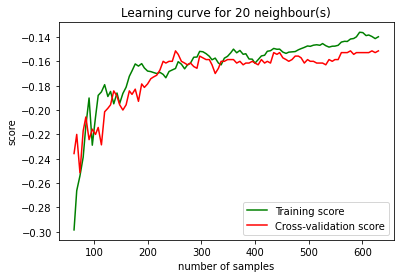

In [13]:
train_mean = np.mean(train_scores,axis=1)
validation_mean = np.mean(validation_scores,axis=1)
fig, ax = plt.subplots()
ax.set_xlabel('number of samples')
ax.set_ylabel('score')
ax.set(title = "Learning curve for 20 neighbour(s)")
ax.plot(train_sizes,train_mean, 'g')
ax.plot(train_sizes,validation_mean, 'r')
ax.legend(['Training score','Cross-validation score'])

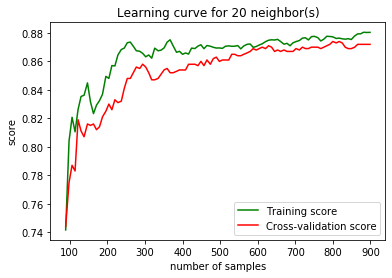

Tune the parameters of the SVC, using GridSearchfor for 10 folds and

`hyperparameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],  'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}`

Print the best parameter values and the scores of the respected SVC classifier.

In [56]:
clf = SVC()
hyperparameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100], 'gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}
gs = GridSearchCV(clf, hyperparameters, cv = 10)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [54]:
print(clf.get_params().keys())
print("Best parameters: ", gs.best_params_)
print("train score: ", gs.score(X_train,y_train))
print("test score:", gs.score(X_test,y_test))

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters:  {'C': 10, 'gamma': 1}
train score:  0.8957142857142857
test score: 0.8733333333333333


dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])
Best parameters: {'C': 1, 'gamma': 1}
train score: 0.8866666666666667
test score: 0.9


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
